In [1]:
import numpy as np
import pandas as pd

In [2]:
dt=pd.read_excel(r'C:\Users\acer\Downloads\iris.xls')

In [3]:
dt.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa


In [4]:
dt.shape

(150, 5)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dt.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
dt.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
## Mean imputation works better if the distribution is normally distributed.
## Median imputation is preferable for skewed(left or right) distribution.

<AxesSubplot:xlabel='SL', ylabel='Count'>

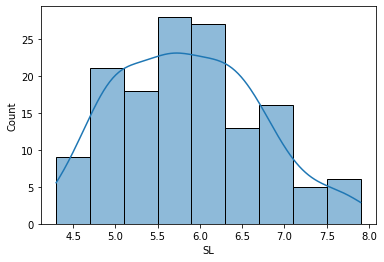

In [10]:
sns.histplot(data=dt['SL'],kde=True)

<AxesSubplot:xlabel='SW', ylabel='Count'>

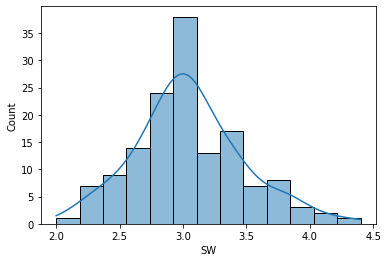

In [11]:
sns.histplot(dt['SW'],kde=True)

<AxesSubplot:xlabel='PL', ylabel='Count'>

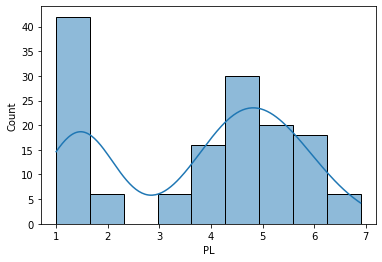

In [12]:
sns.histplot(dt['PL'],kde=True)

<AxesSubplot:>

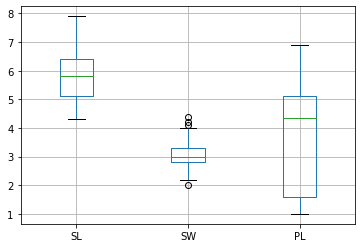

In [13]:
dt[['SL','SW','PL']].boxplot()

In [14]:
## Since there are no outliers,and is skewed,we can fill null values of SL column with median values.

In [15]:
dt['SL'].fillna(value=dt['SL'].median(),inplace=True,axis=0)

In [16]:
## We have to handle outliers in SW column

In [17]:
Q1=dt['SW'].quantile(0.25)
Q3=dt['SW'].quantile(0.75)
IQR=Q3-Q1
L_B=Q1-(1.5*IQR)
U_B=Q3+(1.5*IQR)

In [18]:
dt['SW'].mask(dt['SW']<L_B,L_B,inplace=True)

In [19]:
dt['SW'].mask(dt['SW']>U_B,U_B,inplace=True)

In [20]:
## We will now fill  SW column null vaules with mean

In [21]:
dt['SW'].fillna(dt['SW'].mean(),inplace=True)

In [22]:
## Fill null values with median data in column PL

In [23]:
dt['PL'].fillna(dt['PL'].median(),inplace=True)

In [24]:
dt[['SL','SW','PL']].isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [25]:
## We will create supervised classification ML  models
## Our dependent varaiable is classification column

In [26]:
dt['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [27]:
## we willdo label encoding(nominal encoding) for classification column

D:\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Classification', ylabel='count'>

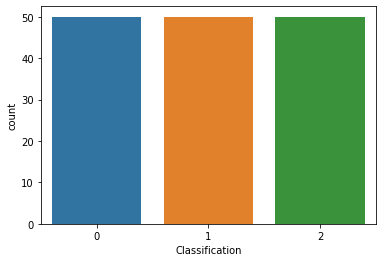

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['Classification']=le.fit_transform(dt['Classification'])
sns.countplot(dt['Classification'])

In [29]:
dt.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

###  Logistic Regression model

In [30]:
x=dt.drop(['Classification'],axis=1)
y=dt['Classification']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x_train,y_train)
y_pred=lor.predict(x_test)
y_pred

D:\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 0, 2, 0, 2, 1])

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print("Confusion matrix:",confusion_matrix(y_test,y_pred))
print("accuracy score is:",accuracy_score(y_test,y_pred))

Confusion matrix: [[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
accuracy score is: 0.9666666666666667


In [34]:
## Here we have multiclass classification(3 classes).Hence we get 3 by 3 confusion matrix

###  Standardising and applying Support Vector Machine Model

In [35]:
x=dt.drop(['Classification'],axis=1)
y=dt['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.26)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
from sklearn.svm import SVC
svmc=SVC(kernel='linear')
svmc.fit(x_train,y_train)
y_pr=svmc.predict(x_test)
y_pr

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0])

In [38]:
print('accuracy score is:',accuracy_score(y_test,y_pr))

accuracy score is: 0.9743589743589743


In [39]:
print('confusion_matrix is:',confusion_matrix(y_test,y_pr))

confusion_matrix is: [[16  0  0]
 [ 0 10  1]
 [ 0  0 12]]


###  Decision Tree model 

In [40]:

from sklearn.model_selection import train_test_split
X=dt[['SL','SW','PL','PW']]
Y=dt['Classification']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.28,random_state=40)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_p=dt_model.predict(x_test)
y_p

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0])

In [42]:
print('accuracy score is:',accuracy_score(y_test,y_p))

accuracy score is: 0.9743589743589743


In [43]:
print('confusion_matrix is:',confusion_matrix(y_test,y_p))

confusion_matrix is: [[16  0  0]
 [ 0 10  1]
 [ 0  0 12]]


###  Random Forest Classifier model

In [44]:
x=dt.drop(['Classification'],axis=1)
y=dt['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.30)

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_predictions=clf.predict(x_test)
y_predictions

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

In [46]:
print('confusion_matrix is:',confusion_matrix(y_test,y_predictions))

confusion_matrix is: [[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]


In [47]:
print('accuracy is:',accuracy_score(y_test,y_predictions))

accuracy is: 0.9777777777777777


# kNN Model

In [48]:
x=dt.drop(['Classification'],axis=1)
y=dt['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.29)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
acc_values=[]
neighbors=np.arange(2,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predi=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predi)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

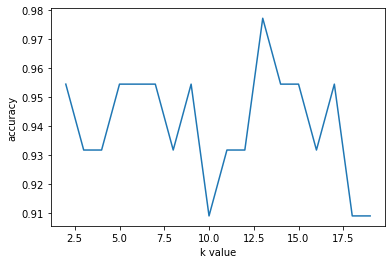

In [51]:
plt.plot(neighbors,acc_values)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [52]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
y_predicts=knn.predict(x_test)
y_predicts

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1])

In [53]:
from sklearn.metrics import accuracy_score
print('accuracy score is:',accuracy_score(y_test,y_predicts))

accuracy score is: 0.9772727272727273


In [54]:
## Since best accuracy  score is predicted by Random Forest Model we will choose 
## this classifier ML model.